# Assignment4 (B) -- Plots

### 2.(35%) Have you demonstrated that you have a solid grasp of at least three of the basic visual analysis techniques in this class (scatter, box, line, violin, histograms, heatmaps, probability plots, treemaps, sploms) and that they were appropriate for the analysis/data you were investigating? 

See the following 2 SPLOM + 1 line plots using mathplotlib and hvplot.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# !pip install matplotlib
# !pip install folium

In [18]:
import pandas as pd
import numpy as np
import hvplot.pandas
import holoviews as hv
import matplotlib.pyplot as plt

# Load dataset
original_run_df = pd.read_csv("run.csv")
bike_df = pd.read_csv("bike.csv")
# display(run_df,bike_df)

## Part I. Correlation
I hypothesize there is a correlation among numerical columns, namely cadence, distance,altitude,heart rate and speed, which would have a direct releationship since the more cadence, either steps in running or rpm in cycling). <br>Implementation:
* Tools: SPLOM with subplots on the selective hypothesized columns
* Data based on activities: Running and Cycling

In [ ]:
# run_df = original_run_df[['timestamp','cadence','distance','enhanced_altitude','heart_rate','speed_kmhr','position_lat','position_long']]

In [20]:
# Filter RUN data for part 1
run_df = original_run_df[['cadence','distance','enhanced_altitude','heart_rate','speed_kmhr']]
run_pt1_df = run_df.rename(columns={'enhanced_altitude':'altitude','speed_kmhr':'speed'})

In [22]:
# Filter CYCLING data for part 1
bike_pt1_df = bike_df[['cadence','distance','enhanced_altitude','heart_rate','speed_kmhr']]
bike_pt1_df = bike_pt1_df.rename(columns={'enhanced_altitude':'altitude','speed_kmhr':'speed'})

In [7]:
# Plotting code for part 1
def create_splom(df,suptitle):
    cols = ['cadence','distance','heart_rate','altitude','speed']
    fig, axs = plt.subplots(len(cols), len(cols), figsize=(10,10))
    fig.suptitle("Correlation for {} Activities".format(suptitle))
    for i in range(len(cols)):
        for j in range(len(cols)):
            axs[i,j].scatter(df[cols[j]], df[cols[i]], s=2)
    
            # Also, we've seen that when we plot multiple Axes things get cluttered with Axis tickmarks and
            # labels, so let's turn those off
            axs[i,j].get_xaxis().set_visible(False)
            axs[i,j].get_yaxis().set_visible(False)
    
            # Then we'll turn them back on only if we are the last row...
            if i == len(cols) - 1:
                axs[i,j].get_xaxis().set_visible(True)
                axs[i,j].set_xlabel(cols[j])
                
            # ...and similarly, only show the y-axis labels for the first column.
            if j == 0:
                axs[i,j].get_yaxis().set_visible(True)
                axs[i,j].set_ylabel(cols[i])

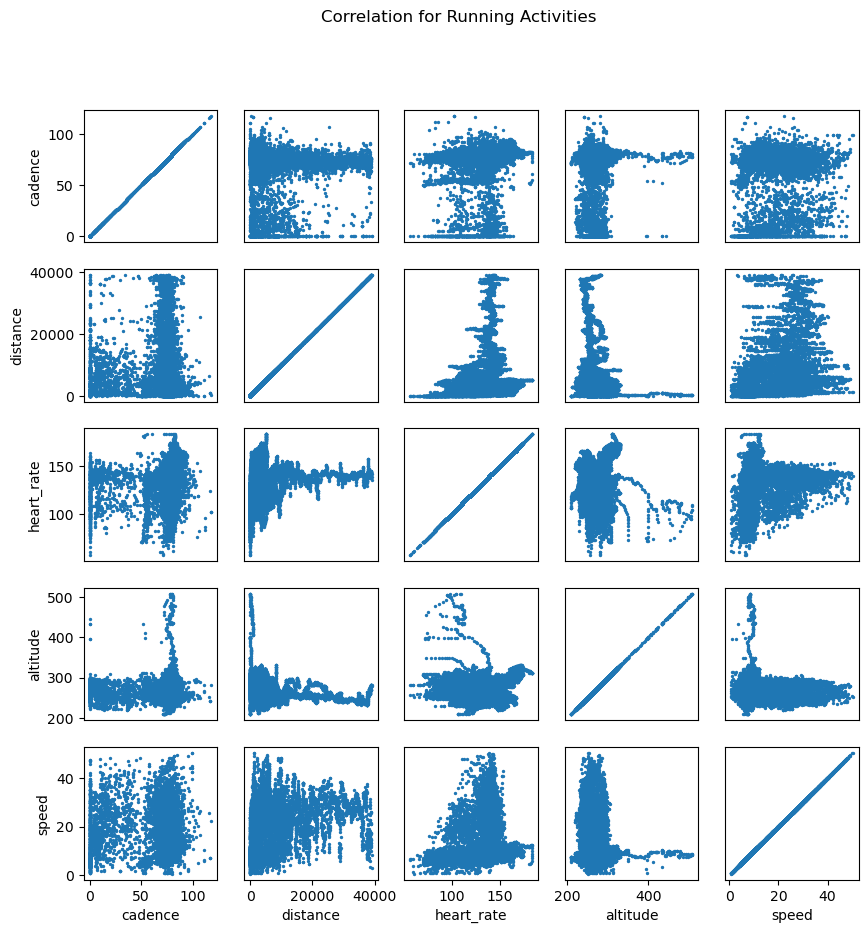

In [23]:
# Draw SPLOM for RUNNING
create_splom(run_pt1_df,"Running")

##### Findings: There are correlation between each pair of running data as follows:
* Speed and heart rate: the higher raises the heart rate since it requires more efforts to speed up.
* Heart rate and distance: the longer a person has run, the heart rate remains high. This would be due to exhaustion. Even running slowing at the end of a marathon would be very exhausting.
* The areas that activities being performed are mostly low altitude. There are couple of activities taking place uphill.

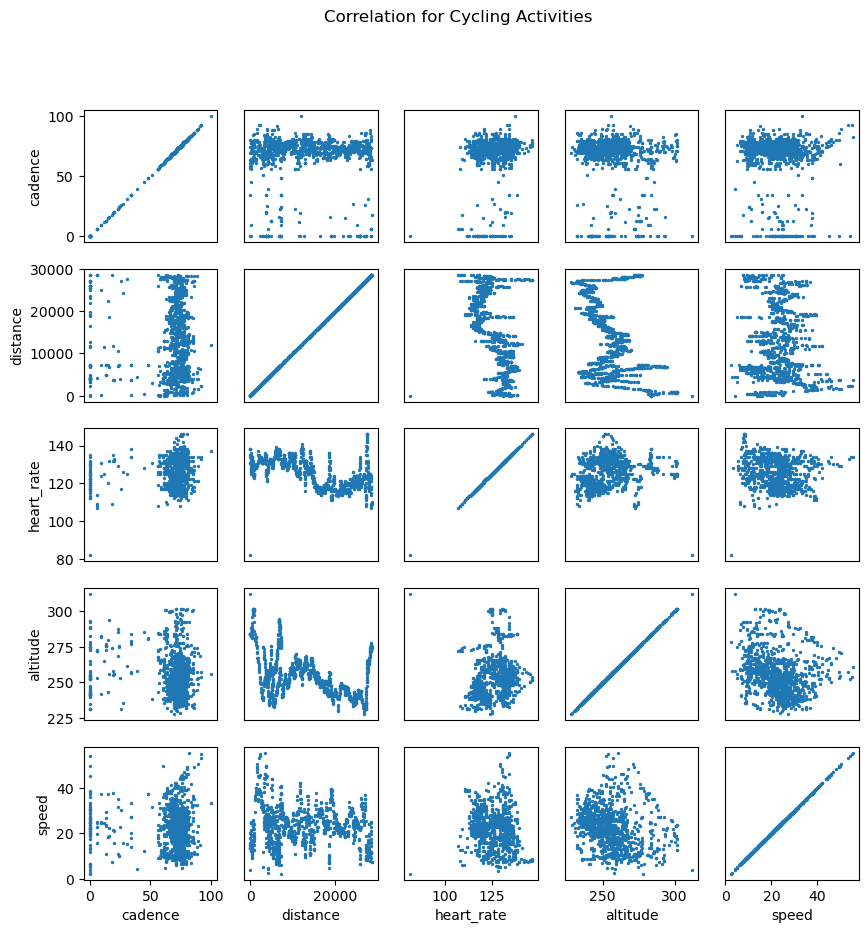

In [9]:
# Draw SPLOM for CYCLING
create_splom(bike_pt1_df,"Cycling")

#### Findings: There are correlation between each pair of cycling data as follows:
* The area of activities taking place with various altitude, meaning multiple up and down hills.
* The moving speed is quite distributed during sessions of cycling.
* Cadence goes along with speed and distance. They all are high, which makes sense for cycling. The correlation indicates that the activity is long run with low exhaustion rate.
  

# Part II. Efficiency Running

We focus on efficiency in running by plotting the variables related to power, resistence, and waste in effort in running sessions.

In [10]:
# Filter data for part 2
part2_df = original_run_df[['timestamp','Air Power','Form Power','Power','cadence','Ground Time','Leg Spring Stiffness','Vertical Oscillation']].dropna()
part2_df = part2_df[part2_df['Form Power'].notnull()]

In [32]:
matrics_list = ['Air Power','Form Power','Power','cadence','Ground Time','Leg Spring Stiffness','Vertical Oscillation']

# Create line plots
lines = part2_df.hvplot.line(
    x='timestamp',
    y=['Air Power','Form Power','Power','cadence','Ground Time','Leg Spring Stiffness','Vertical Oscillation'],
    by='y',
    subplots=True,
    shared_axes=False,
    width=420, height=200,
).cols(2)

display(lines)

:NdLayout   [Variable]
   :Curve   [timestamp]   (value)

#### Findings: There are correlation between each pair of cycling data as follows:
* Air power: it is typically 2% for marathon and 8% for sprinting. According to the ratio of AirPower/Power, the values is quite low, meaning the runner performs well with minimize Air resistence power.
* Form power: normal range is 24-31%, the faster run, the lower number. The ratio of FormPower/Power is around 32%, which means the run is not a sprint, but easy run/marathon.
* Cadence: normal range is 180 steps/min. The runner performs only half of the running range again indicating the most of activities are easy runs.
* Leg Spring Stiffness: typically ranges from 7 to 17 kN/m. The average value is 14, and it indicates decent economy of the leg muscle.
* Normal Vertical Oscillation is 5-10 cm, the person has a good running gesture. 

### 3.(15%) Have you demonstrated that you have a solid grasp of at least one of the more advanced visual analysis techniques in this class (Don’t use any visualizations listed as basic plots above. You can explore a new visualization technique that the lecture didn’t teach you, or you can even come up with a combination of multiple types of plots to generate an advanced plot) , and that it was appropriate for the analysis/data you were investigating? The grading rubric is the same as the basic plots. You may use other advanced plots with permission in this category (ask first to ensure they seem reasonably advanced). 

Build 2 map plots for running and cycling to show the routes of a day running and cycling activities with Folium..

# Part III. Activity Map Routes: Running & Cycling


In [26]:
import folium

# Pick 1 running session by Date = 2019-10-03
run_map_df = original_run_df[['timestamp','position_lat','position_long']]
run_map_df['date'] = pd.to_datetime(run_map_df['timestamp'])
run_map_df = run_map_df[run_map_df['date'].dt.date == pd.to_datetime('2019-10-03').date()]
run_map_df['pos_lat_degrees'] = run_map_df['position_lat'] * (180 / 2**31)
run_map_df['pos_long_degrees'] = run_map_df['position_long'] * (180 / 2**31)
run_map_df = run_map_df.dropna()

In [34]:
# Get the center of the map
min_lat = run_map_df['pos_lat_degrees'].min()
min_long = run_map_df['pos_long_degrees'].min()
max_lat = run_map_df['pos_lat_degrees'].max()
max_long = run_map_df['pos_long_degrees'].max()

# Calling API with line plot overlayed
m = folium.Map(location=[(min_lat + max_lat)/2,(min_long + max_long)/2],zoom_start=12)
folium.Marker([run_map_df['pos_lat_degrees'].iloc[0],run_map_df['pos_long_degrees'].iloc[0]],popup="Start").add_to(m)
folium.Marker([run_map_df['pos_lat_degrees'].iloc[-1],run_map_df['pos_long_degrees'].iloc[-1]],popup="Stop").add_to(m)
route = folium.PolyLine(locations=zip(run_map_df['pos_lat_degrees'],run_map_df['pos_long_degrees']),weight=3,color='blue').add_to(m)
display(m)

The running route on Oct 03, 2019 is from Ann Arbor heading northwest to Dexter.

In [28]:
bike_map_df = bike_df[['timestamp','position_lat','position_long']]
bike_map_df['pos_lat_degrees'] = bike_map_df['position_lat'] * (180 / 2**31)
bike_map_df['pos_long_degrees'] = bike_map_df['position_long'] * (180 / 2**31)

# Get the center of the map
min_lat = bike_map_df['pos_lat_degrees'].min()
min_long = bike_map_df['pos_long_degrees'].min()
max_lat = bike_map_df['pos_lat_degrees'].max()
max_long = bike_map_df['pos_long_degrees'].max()

# Calling API with line plot overlayed
m = folium.Map(location=[(min_lat + max_lat)/2,(min_long + max_long)/2],zoom_start=13)
folium.Marker([bike_map_df['pos_lat_degrees'].iloc[0],bike_map_df['pos_long_degrees'].iloc[0]],popup="Start").add_to(m)
folium.Marker([bike_map_df['pos_lat_degrees'].iloc[-1],bike_map_df['pos_long_degrees'].iloc[-1]],popup="Stop").add_to(m)
route = folium.PolyLine(locations=zip(bike_map_df['pos_lat_degrees'],bike_map_df['pos_long_degrees']),weight=3,color='blue').add_to(m)
display(m)

The cycling route is from Ann Arbor heading northwest to Dexter Hurn Metropolitan park.

### 4.(20%) Are you able to provide an interesting and defensible analysis? For both datasets, your visualization should help Professor Brooks understand what this data means. If your data science discovery will make the client happy, then this part of the overall grade tilts up towards 20%. If there are obvious things you should have looked at, then it tilts down towards 0%. 

The responses are inline for each plot.

### 5. (10%) Are the final results displayed in the report that tells your story? 

It is a great experience exploring the data I have never known, especially the raw data from the device. Started from searching of definitions, meaning, normal ranges/values, and the interpreation of the matrices. Additionally, it is a worthwhile hands-on task to tackle the data issue, like null, missing, duplicate, multiple sourcing fields. Therefore, I have learned how to clean, merge and transform data appropriately. Last but not least, the analysis and result demonstrates how the person performs the activities, and I can imagine every move of Prof. Brooks during the exercise.